# INTIS - Challenge for AI Engineer position

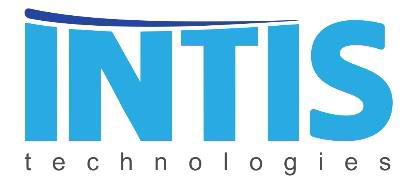

# 0. Imports

In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.estimator import DNNRegressor

# 1. Model

In [9]:
# Loading dataset from csv file.
vineyard_data = pd.read_csv("./data/podaci.csv", sep=",", names=["x1", "x2", "x3", "x4", "u"])
vineyard_data.head(5)

,x1,x2,x3,x4,u
0,9.353670,-5.681740,1.739091,26.117712,95.610349
1,7.136365,-8.842209,1.712237,42.389300,171.811854
2,11.457191,-8.771499,1.500788,41.984114,173.865403
3,8.772591,-4.087157,2.443511,12.612862,53.146681
4,4.958833,-8.140877,1.651389,34.904362,142.692822


In [14]:
X = vineyard_data.iloc[:, :-1]
y = vineyard_data.iloc[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=101)

In [22]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [25]:
feature_names = vineyard_data.columns

input_func= tf.estimator.inputs.pandas_input_fn(x=X_train, 
                                                y= X_train, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

test_input_func = tf.estimator.inputs.pandas_input_fn(x= X_test,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)

eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)






AttributeError: module 'tensorflow.estimator' has no attribute 'inputs'

In [ ]:
regressor = DNNRegressor(feature_columns=feature_names, hidden_units=[10, 20, 10])
regressor.fit(X_train, y_train, steps=5000, batch_size=1)
regressor.train()

#.train(input_fn=input_func,steps=20000)